In [18]:
%matplotlib notebook

In [1]:
import biff
import sys
sys.path.append('../')
import coefficients_smoothing
import pygadgetreader
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib
import jellyfish

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/usr/local/lib/python3.5/dist-packages/Jellyfish-0.1.0-py3.5.egg/jellyfish/orbit.py:8: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py", line 16, in <module>
    a

In [2]:
def load_density(dens_fname, nbins):
    rho_mwlmc = np.loadtxt(dens_fname)
    rho_matrix = np.reshape(rho_mwlmc, (nbins, nbins, nbins))
    return rho_matrix

In [65]:
densities1 = '../rhomwlmc.txt'

densities2 = '../rho_mwlmc_bfe.txt'
rho1 = load_density(densities1, 120)


In [66]:
rho2 = load_density(densities2, 101)


In [67]:
print(np.shape(rho1), np.shape(rho2))

(120, 120, 120) (101, 101, 101)


In [84]:
x_grid = np.arange(-200, 200, 3.98)
y_grid = np.arange(-200, 200, 3.98)
z_grid = np.arange(-200, 200, 3.98)
x_grid, y_grid, z_grid = np.meshgrid(x_grid, y_grid, z_grid)


In [86]:
np.shape(x_grid)

(101, 101, 101)

In [87]:
len(x_grid.flatten())

1030301

In [88]:
print(np.nanmax(rho1), np.nanmin(rho1))

1436.0427614734735 -0.0017669672068963563


In [89]:
print(np.nanmax(rho2), np.nanmin(rho2))

0.0011941336018092676 -3.062864571940959e-09


In [90]:
density_contours = np.logspace(np.nanmin(np.log10(rho1)), np.nanmax(np.log10(rho1)), 10)
density_contours2 = np.logspace(np.nanmin(np.log10(rho2)), np.nanmax(np.log10(rho2)), 10)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


In [9]:
density_contours

array([1.53612542e-08, 2.54330160e-07, 4.21084303e-06, 6.97172489e-05,
       1.15428069e-03, 1.91109650e-02, 3.16412627e-01, 5.23871769e+00,
       8.67353597e+01, 1.43604276e+03])

In [91]:
density_contours2

array([9.23467954e-15, 1.58506657e-13, 2.72065318e-12, 4.66980622e-11,
       8.01538774e-10, 1.37578387e-08, 2.36143442e-07, 4.05323296e-06,
       6.95708393e-05, 1.19413360e-03])

In [11]:
#likelihood(xyz_rot.T, pos_fit)

## Now let's study the density goodness of fit with ellipsoids

In [12]:
for i in range(1,len(density_contours)-1):
    print(i)
    index_dens1 = np.where((rho1>density_contours[i]-density_contours[i]*0.2)
                           & ((rho1<density_contours[i]+density_contours[i]*0.2)))
    print(len(index_dens1[0]))

7
153
2336
28734
123516
78331
6418
353


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


In [35]:
index_dens1 = np.where((rho1>density_contours[2]-density_contours[2]*0.8) & ((rho1<density_contours[2]+density_contours[2]*0.8)))
index_dens2 = np.where((rho1>density_contours[3]-density_contours[3]*0.8) & ((rho1<density_contours[3]+density_contours[3]*0.8)))
index_dens3 = np.where((rho1>density_contours[4]-density_contours[4]*0.2) & ((rho1<density_contours[4]+density_contours[4]*0.2)))
index_dens4 = np.where((rho1>density_contours[5]-density_contours[5]*0.05) & ((rho1<density_contours[5]+density_contours[5]*0.05)))
index_dens5 = np.where((rho1>density_contours[6]-density_contours[6]*0.02) & ((rho1<density_contours[6]+density_contours[6]*0.02)))
index_dens6 = np.where((rho1>density_contours[7]-density_contours[7]*0.1) & ((rho1<density_contours[7]+density_contours[7]*0.1)))
index_dens7 = np.where((rho1>density_contours[8]-density_contours[8]*0.2) & ((rho1<density_contours[8]+density_contours[8]*0.2)))
index_dens8 = np.where((rho1>density_contours[9]-density_contours[9]*0.8) & ((rho1<density_contours[9]+density_contours[9]*0.8)))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-package

In [36]:
len(index_dens7[0])

353

<IPython.core.display.Javascript object>


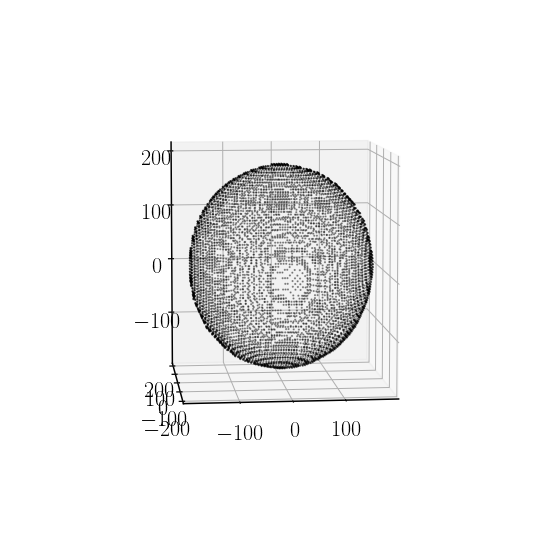

In [19]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

#hack  for equal axes
ax.set_aspect('equal')
ax.scatter(x_grid[index_dens5], y_grid[index_dens5], z_grid[index_dens5], marker='.', color='k', s=2, alpha=0.4)
#ax.set_xlim(-60, 60)
#ax.set_ylim(-60, 60)
#ax.set_zlim(-60, 60)

<IPython.core.display.Javascript object>


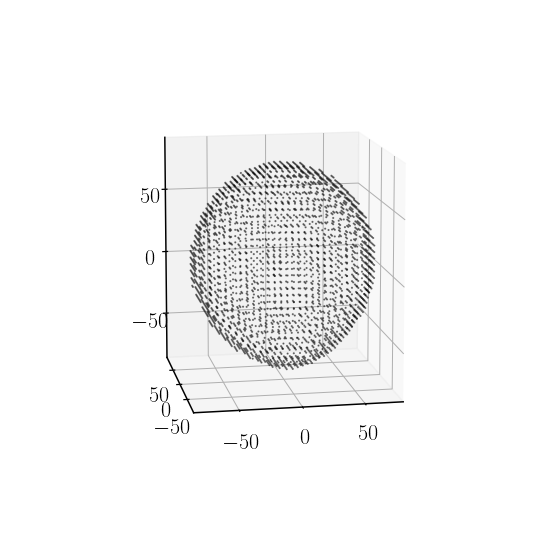

In [21]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

#hack  for equal axes
ax.set_aspect('equal')
ax.scatter(x_grid[index_dens6], y_grid[index_dens6], z_grid[index_dens6], marker='.', color='k', s=2,
           alpha=0.5)
#ax.set_xlim(-60, 60)
#ax.set_ylim(-60, 60)
#ax.set_zlim(-60, 60)

<IPython.core.display.Javascript object>


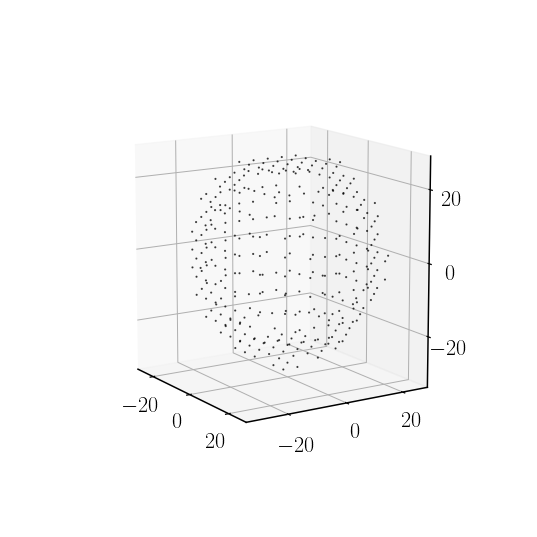

In [37]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

#hack  for equal axes
ax.set_aspect('equal')
ax.scatter(x_grid[index_dens7], y_grid[index_dens7], z_grid[index_dens7], marker='.', color='k', s=2, 
           alpha=0.7)
#ax.set_xlim(-60, 60)
#ax.set_ylim(-60, 60)
#ax.set_zlim(-60, 60)

In [61]:
eigvec_7, eigval_7, s_7, q_7 = jellyfish.axis_ratios(np.array([x_grid[index_dens7], y_grid[index_dens7], z_grid[index_dens7]]).T)
eigvec_6, eigval_6, s_6, q_6 = jellyfish.axis_ratios(np.array([x_grid[index_dens6], y_grid[index_dens6], z_grid[index_dens6]]).T)
eigvec_5, eigval_5, s_5, q_5 = jellyfish.axis_ratios(np.array([x_grid[index_dens5], y_grid[index_dens5], z_grid[index_dens5]]).T)

In [52]:
len(index_dens7[0])

353

In [222]:
pos_elli_7 = jellyfish.ellipse_3dcartesian((3*eigval_7/len(index_dens7[0]))**0.5, eigvec_7)
pos_elli_6 = jellyfish.ellipse_3dcartesian((3*eigval_6/len(index_dens6[0]))**0.5, eigvec_6)
pos_elli_5 = jellyfish.ellipse_3dcartesian((3*eigval_5/len(index_dens5[0]))**0.5, eigvec_5)

<IPython.core.display.Javascript object>


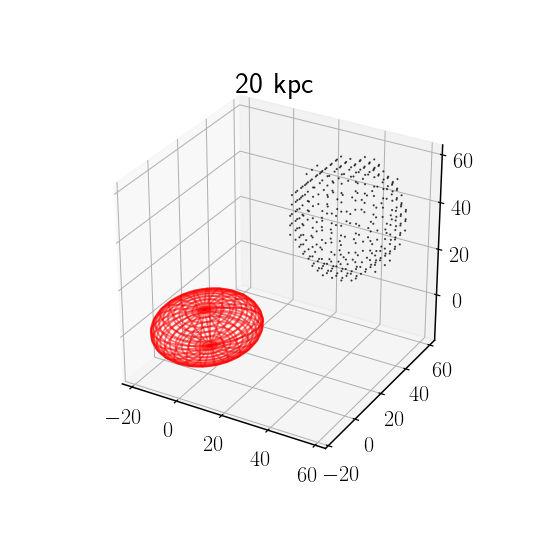

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [223]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')
ax.set_title('20 kpc')
ax.scatter(x_grid[index_dens7], y_grid[index_dens7], z_grid[index_dens7], marker='.', color='k', s=2, 
           alpha=0.7)
ax.plot_wireframe(pos_elli_7[:,:,0], pos_elli_7[:,:,1], pos_elli_7[:,:,2], rstride=4, cstride=4, color='r', alpha=0.5)

#ax.set_xlim(-1, 1)

<IPython.core.display.Javascript object>


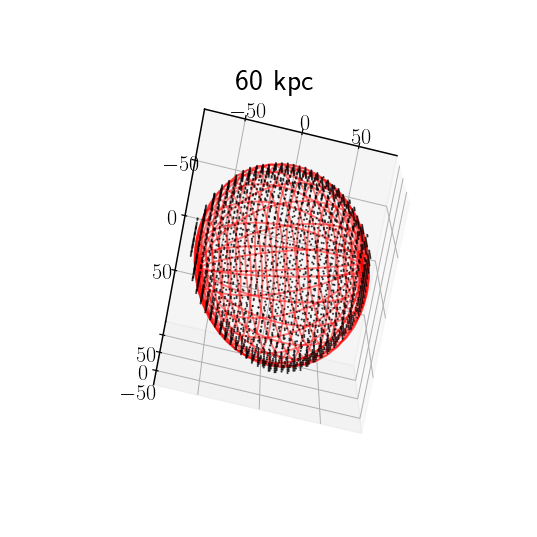

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [63]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')
ax.set_title('60 kpc')
ax.scatter(x_grid[index_dens6], y_grid[index_dens6], z_grid[index_dens6], marker='.', color='k', s=2, 
           alpha=0.7)
ax.plot_wireframe(pos_elli_6[:,:,0], pos_elli_6[:,:,1], pos_elli_6[:,:,2], rstride=4, cstride=4, color='r', alpha=0.5)


<IPython.core.display.Javascript object>


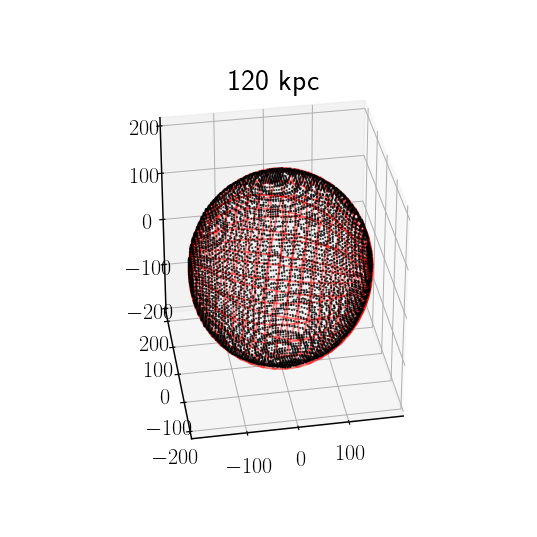

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [64]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')
ax.set_title('120 kpc')
ax.scatter(x_grid[index_dens5], y_grid[index_dens5], z_grid[index_dens5], marker='.', color='k', s=2, 
           alpha=0.7)
ax.plot_wireframe(pos_elli_5[:,:,0], pos_elli_5[:,:,1], pos_elli_5[:,:,2], rstride=4, cstride=4, color='r', alpha=0.5)


# MW+LMC particles

In [93]:
for i in range(1,len(density_contours2)-1):
    print(i)
    index_dens2 = np.where((rho2>density_contours2[i]-density_contours2[i]*0.2)
                           & ((rho2<density_contours2[i]+density_contours2[i]*0.2)))
    print(len(index_dens2[0]))

1
3
2
79
3
1185
4
10705
5
33507
6
25076
7
3107
8
233


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


In [108]:
index_dens21 = np.where((rho2>density_contours2[2]-density_contours2[2]*0.8) & ((rho2<density_contours2[2]+density_contours2[2]*0.8)))
index_dens22 = np.where((rho2>density_contours2[3]-density_contours2[3]*0.3) & ((rho2<density_contours2[3]+density_contours2[3]*0.3)))
index_dens23 = np.where((rho2>density_contours2[4]-density_contours2[4]*0.2) & ((rho2<density_contours2[4]+density_contours2[4]*0.2)))
index_dens24 = np.where((rho2>density_contours2[5]-density_contours2[5]*0.05) & ((rho2<density_contours2[5]+density_contours2[5]*0.05)))
index_dens25 = np.where((rho2>density_contours2[6]-density_contours2[6]*0.02) & ((rho2<density_contours2[6]+density_contours2[6]*0.02)))
index_dens26 = np.where((rho2>density_contours2[7]-density_contours2[7]*0.1) & ((rho2<density_contours2[7]+density_contours2[7]*0.1)))
index_dens27 = np.where((rho2>density_contours2[8]-density_contours2[8]*0.2) & ((rho2<density_contours2[8]+density_contours2[8]*0.2)))
index_dens28 = np.where((rho2>density_contours2[9]-density_contours2[9]*0.8) & ((rho2<density_contours2[9]+density_contours2[9]*0.8)))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in greater
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-package

<IPython.core.display.Javascript object>


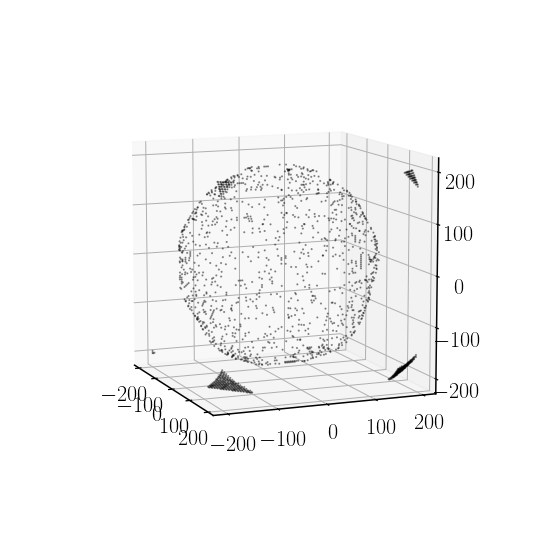

In [109]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

#hack  for equal axes
ax.set_aspect('equal')
ax.scatter(x_grid[index_dens22], y_grid[index_dens22], z_grid[index_dens22], marker='.', color='k', s=2, alpha=0.4)
#ax.set_xlim(-60, 60)
#ax.set_ylim(-60, 60)
#ax.set_zlim(-60, 60)

<IPython.core.display.Javascript object>


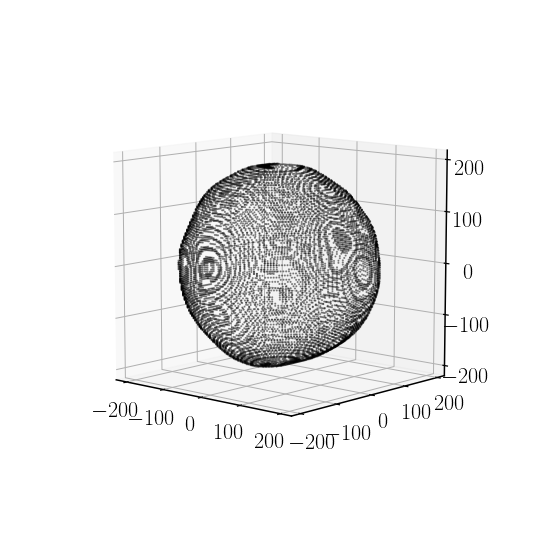

In [99]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

#hack  for equal axes
ax.set_aspect('equal')
ax.scatter(x_grid[index_dens23], y_grid[index_dens23], z_grid[index_dens23], marker='.', color='k', s=2, alpha=0.4)
#ax.set_xlim(-60, 60)
#ax.set_ylim(-60, 60)
#ax.set_zlim(-60, 60)

<IPython.core.display.Javascript object>


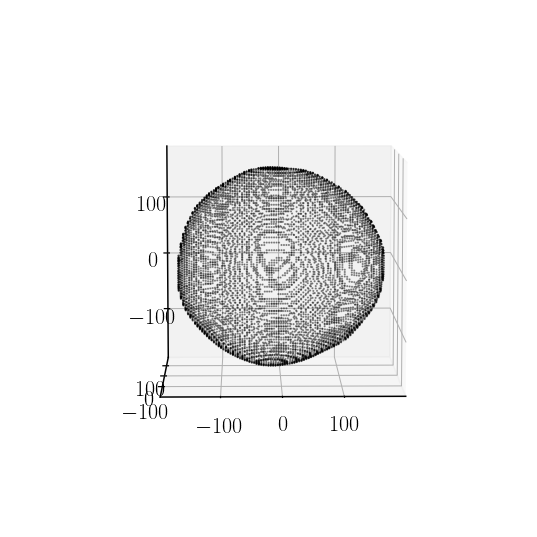

In [100]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

#hack  for equal axes
ax.set_aspect('equal')
ax.scatter(x_grid[index_dens23], y_grid[index_dens23], z_grid[index_dens23], marker='.', color='k', s=2, alpha=0.4)
#ax.set_xlim(-60, 60)
#ax.set_ylim(-60, 60)
#ax.set_zlim(-60, 60)

<IPython.core.display.Javascript object>


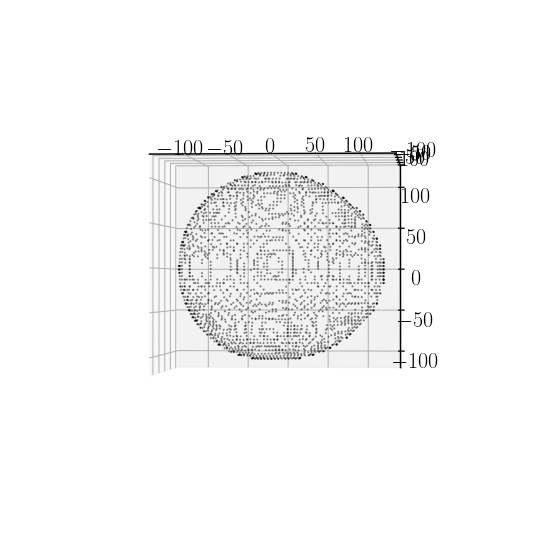

In [101]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

#hack  for equal axes
ax.set_aspect('equal')
ax.scatter(x_grid[index_dens25], y_grid[index_dens25], z_grid[index_dens25], marker='.', color='k', s=2, alpha=0.4)
#ax.set_xlim(-60, 60)
#ax.set_ylim(-60, 60)
#ax.set_zlim(-60, 60)

<IPython.core.display.Javascript object>


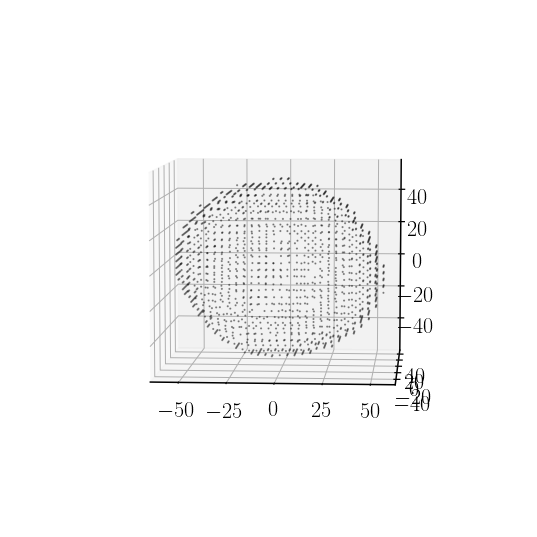

In [102]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

#hack  for equal axes
ax.set_aspect('equal')
ax.scatter(x_grid[index_dens26], y_grid[index_dens26], z_grid[index_dens26], marker='.', color='k', s=2, alpha=0.4)
#ax.set_xlim(-60, 60)
#ax.set_ylim(-60, 60)

<IPython.core.display.Javascript object>


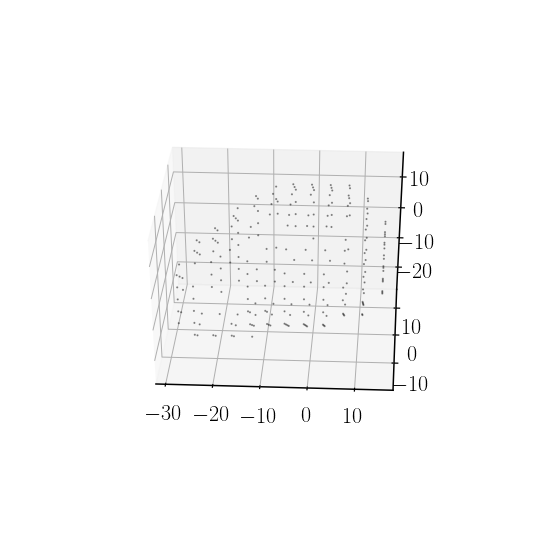

In [103]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

#hack  for equal axes
ax.set_aspect('equal')
ax.scatter(x_grid[index_dens27], y_grid[index_dens27], z_grid[index_dens27], marker='.', color='k', s=2, alpha=0.4)
#ax.set_xlim(-60, 60)
#ax.set_ylim(-60, 60)

In [110]:
eigvec_7, eigval_7, s_7, q_7 = jellyfish.axis_ratios(np.array([x_grid[index_dens27], y_grid[index_dens27], z_grid[index_dens27]]).T)
eigvec_6, eigval_6, s_6, q_6 = jellyfish.axis_ratios(np.array([x_grid[index_dens26], y_grid[index_dens26], z_grid[index_dens26]]).T)
eigvec_5, eigval_5, s_5, q_5 = jellyfish.axis_ratios(np.array([x_grid[index_dens25], y_grid[index_dens25], z_grid[index_dens25]]).T)
eigvec_4, eigval_4, s_4, q_4 = jellyfish.axis_ratios(np.array([x_grid[index_dens24], y_grid[index_dens24], z_grid[index_dens24]]).T)
eigvec_3, eigval_3, s_3, q_3 = jellyfish.axis_ratios(np.array([x_grid[index_dens23], y_grid[index_dens23], z_grid[index_dens23]]).T)

In [230]:
pos_elli_7 = jellyfish.ellipse_3dcartesian((3*eigval_7/len(index_dens27[0]))**0.5, eigvec_7.T)
pos_elli_6 = jellyfish.ellipse_3dcartesian((3*eigval_6/len(index_dens26[0]))**0.5, eigvec_6)
pos_elli_5 = jellyfish.ellipse_3dcartesian((3*eigval_5/len(index_dens25[0]))**0.5, eigvec_5)
pos_elli_4 = jellyfish.ellipse_3dcartesian((3*eigval_4/len(index_dens24[0]))**0.5, eigvec_4)
pos_elli_3 = jellyfish.ellipse_3dcartesian((3*eigval_3/len(index_dens23[0]))**0.5, eigvec_3)


In [252]:
def plot_elli_fit(xgrid, ygrid, zgrid, pos_elli):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_aspect('equal')
    r_shell = int(np.mean(np.sqrt(pos_elli[:,:,0]**2 + pos_elli[:,:,1]**2 + pos_elli[:,:,2]**2)))
    ax.set_title('{} kpc'.format(r_shell))
    ax.scatter(xgrid, ygrid, zgrid, marker='.', color='k', s=2, 
               alpha=0.7)
    ax.plot_wireframe(pos_elli[:,:,0], pos_elli[:,:,1], pos_elli[:,:,2], rstride=4, cstride=4, color='r', alpha=0.5)
    return r_shell

<IPython.core.display.Javascript object>


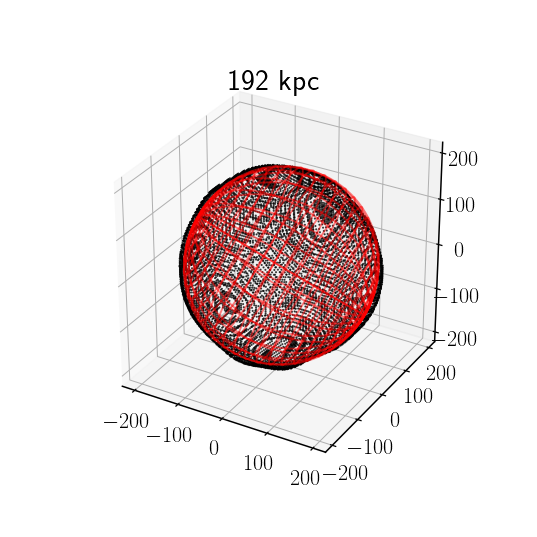

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<IPython.core.display.Javascript object>


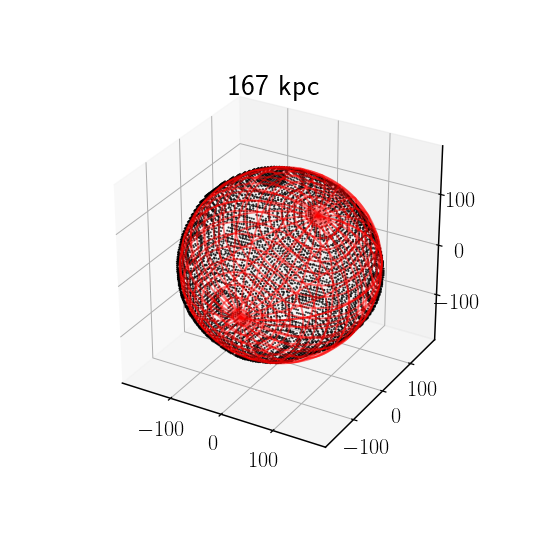

In [253]:
r_s_23 = plot_elli_fit(x_grid[index_dens23], y_grid[index_dens23], z_grid[index_dens23], pos_elli_3)
r_s_24 = plot_elli_fit(x_grid[index_dens24], y_grid[index_dens24], z_grid[index_dens24], pos_elli_4)


<IPython.core.display.Javascript object>


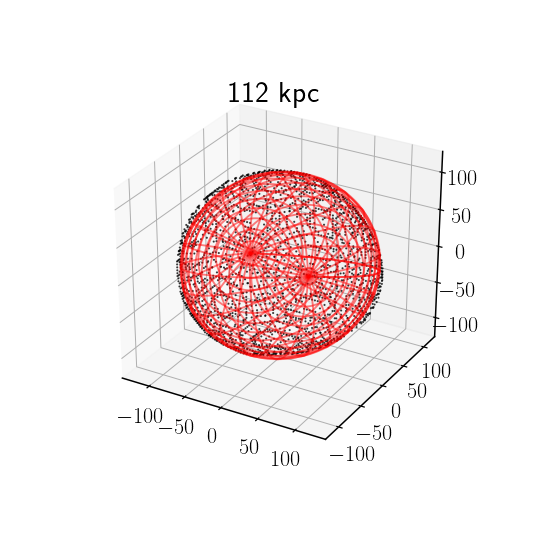

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


<IPython.core.display.Javascript object>


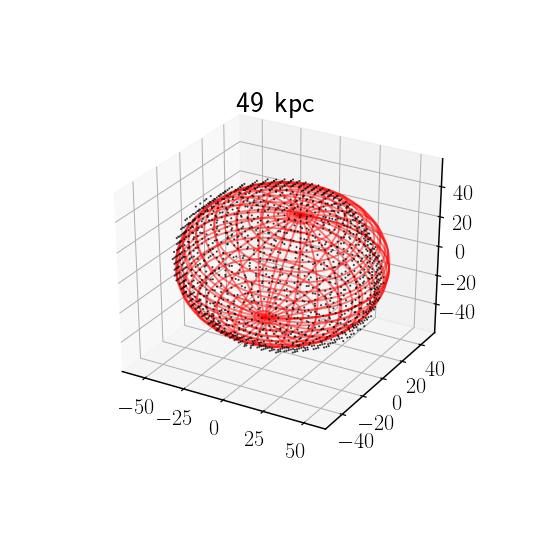

In [254]:
r_s_25 =plot_elli_fit(x_grid[index_dens25], y_grid[index_dens25], z_grid[index_dens25], pos_elli_5)
r_s_26 = plot_elli_fit(x_grid[index_dens26], y_grid[index_dens26], z_grid[index_dens26], pos_elli_6)


<IPython.core.display.Javascript object>


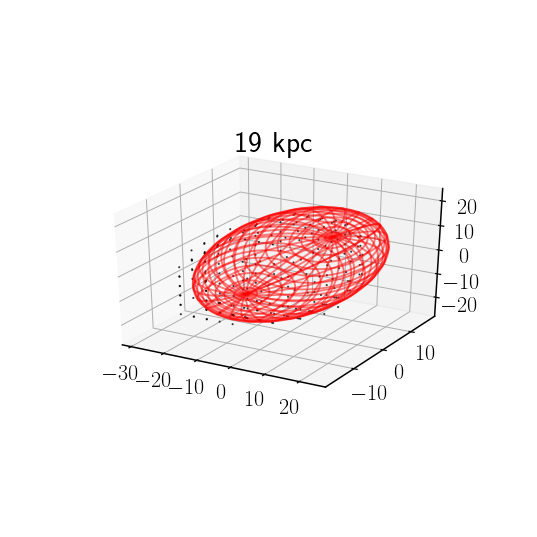

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: ComplexWarning: Casting complex values to real discards the imaginary part
  """
/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [255]:
r_s_27 = plot_elli_fit(x_grid[index_dens27], y_grid[index_dens27], z_grid[index_dens27], pos_elli_7)

<IPython.core.display.Javascript object>


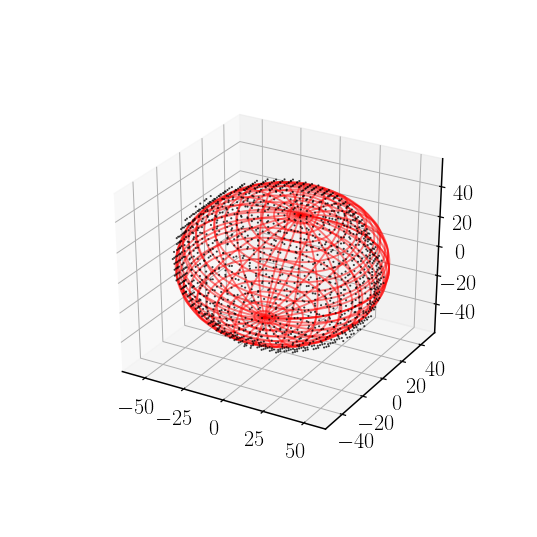

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [232]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')
#ax.set_title('120 kpc')
ax.scatter(x_grid[index_dens26], y_grid[index_dens26], z_grid[index_dens26], marker='.', color='k', s=2, 
           alpha=0.7)
ax.plot_wireframe(pos_elli_6[:,:,0], pos_elli_6[:,:,1], pos_elli_6[:,:,2], rstride=4, cstride=4, color='r', alpha=0.5)


In [233]:
def twod_fits_plot(xgrid, ygrid, zgrid, xgrid_fit, ygrid_fit, zgrid_fit):
    x_data1, y_data1 = jellyfish.shapes.twod_surface(xgrid, ygrid)
    x_data2, y_data2 = jellyfish.shapes.twod_surface(xgrid, zgrid)
    y_data3, z_data3 = jellyfish.shapes.twod_surface(ygrid, zgrid)
    
    x_fit1, y_fit1 = jellyfish.shapes.twod_surface(xgrid_fit, ygrid_fit)
    x_fit2, y_fit2 = jellyfish.shapes.twod_surface(xgrid_fit, zgrid_fit)
    y_fit3, z_fit3 = jellyfish.shapes.twod_surface(ygrid_fit, zgrid_fit)
    
    return [x_data1, y_data1, x_data2, y_data2, y_data3, z_data3], [x_fit1, y_fit1, x_fit2, y_fit2, y_fit3, z_fit3]
    

In [234]:
data_2d_23, fit_2d_23 = twod_fits_plot(x_grid[index_dens23].flatten(), y_grid[index_dens23].flatten(),
                                       z_grid[index_dens23].flatten(), pos_elli_3[:,:,0].flatten(), 
                                       pos_elli_3[:,:,1].flatten(), pos_elli_3[:,:,2].flatten())


data_2d_24, fit_2d_24 = twod_fits_plot(x_grid[index_dens24].flatten(), y_grid[index_dens24].flatten(),
                                       z_grid[index_dens24].flatten(), pos_elli_4[:,:,0].flatten(), 
                                       pos_elli_4[:,:,1].flatten(), pos_elli_4[:,:,2].flatten())


data_2d_25, fit_2d_25 = twod_fits_plot(x_grid[index_dens25].flatten(), y_grid[index_dens25].flatten(),
                                       z_grid[index_dens25].flatten(), pos_elli_5[:,:,0].flatten(), 
                                       pos_elli_5[:,:,1].flatten(), pos_elli_5[:,:,2].flatten())


data_2d_26, fit_2d_26 = twod_fits_plot(x_grid[index_dens26].flatten(), y_grid[index_dens26].flatten(),
                                       z_grid[index_dens26].flatten(), pos_elli_6[:,:,0].flatten(), 
                                       pos_elli_6[:,:,1].flatten(), pos_elli_6[:,:,2].flatten())


data_2d_27, fit_2d_27 = twod_fits_plot(x_grid[index_dens27].flatten(), y_grid[index_dens27].flatten(),
                                       z_grid[index_dens27].flatten(), pos_elli_7[:,:,0].flatten(), 
                                       pos_elli_7[:,:,1].flatten(), pos_elli_7[:,:,2].flatten())


/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:632: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order='C', ndmin=1)


<IPython.core.display.Javascript object>


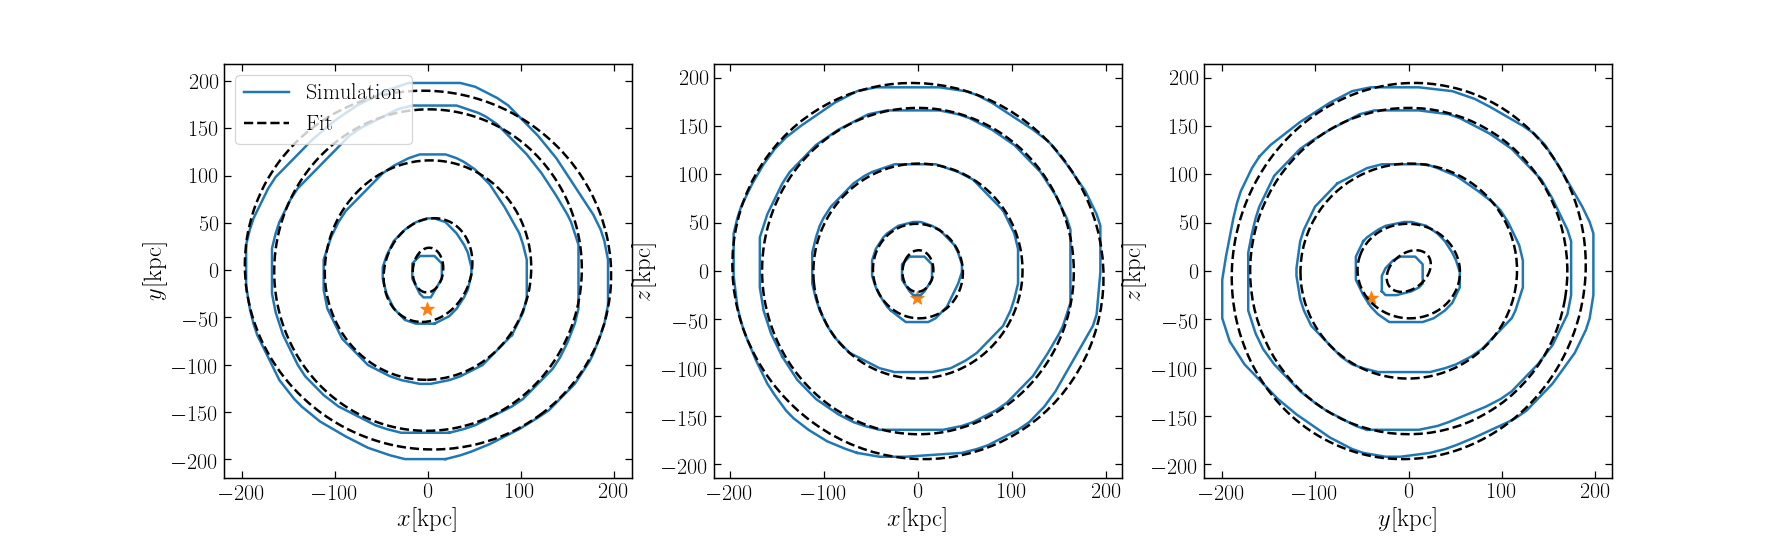

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [248]:
fig, ax = plt.subplots(1, 3, figsize=(20,6))
ax[0].plot(data_2d_23[1], data_2d_23[0], label=r'$\rm{Simulation}$', lw=2, c='C0')
ax[0].plot(fit_2d_23[1], fit_2d_23[0], label=r'$\rm{Fit}$', lw=2, ls='--', c='k')

ax[0].plot(data_2d_24[1], data_2d_24[0],  lw=2,c='C0')
ax[0].plot(fit_2d_24[1], fit_2d_24[0],  lw=2, ls='--', c='k')

ax[0].plot(data_2d_25[1], data_2d_25[0],lw=2, c='C0')
ax[0].plot(fit_2d_25[1], fit_2d_25[0], lw=2, ls='--', c='k')


ax[0].plot(data_2d_26[1], data_2d_26[0], lw=2, c='C0')
ax[0].plot(fit_2d_26[1], fit_2d_26[0], lw=2, ls='--', c='k')

ax[0].plot(data_2d_27[1], data_2d_27[0], lw=2, c='C0')
ax[0].plot(fit_2d_27[1], fit_2d_27[0], lw=2, ls='--', c='k')

ax[0].set_xlim(-220, 220)

ax[0].legend()


ax[1].plot(data_2d_23[4], data_2d_23[5], label='data', lw=2, c='C0')
ax[1].plot(fit_2d_23[4], fit_2d_23[5], label='Fit', lw=2, ls='--', c='k')

ax[1].plot(data_2d_24[4], data_2d_24[5], label='data', lw=2, c='C0')
ax[1].plot(fit_2d_24[4], fit_2d_24[5], label='Fit', lw=2, ls='--', c='k')

ax[1].plot(data_2d_25[4], data_2d_25[5], label='data', lw=2, c='C0')
ax[1].plot(fit_2d_25[4], fit_2d_25[5], label='Fit', lw=2, ls='--', c='k')

ax[1].plot(data_2d_26[4], data_2d_26[5], label='data', lw=2, c='C0')
ax[1].plot(fit_2d_26[4], fit_2d_26[5], label='Fit', lw=2, ls='--', c='k')

ax[1].plot(data_2d_27[4], data_2d_27[5], label='data', lw=2, c='C0')
ax[1].plot(fit_2d_27[4], fit_2d_27[5], label='Fit', lw=2, ls='--', c='k')


ax[2].plot(data_2d_23[2], data_2d_23[3], label='data', lw=2, c='C0')
ax[2].plot(fit_2d_23[2], fit_2d_23[3], label='Fit', lw=2, ls='--', c='k')

ax[2].plot(data_2d_24[2], data_2d_24[3], label='data', lw=2, c='C0')
ax[2].plot(fit_2d_24[2], fit_2d_24[3], label='Fit', lw=2, ls='--', c='k')

ax[2].plot(data_2d_25[2], data_2d_25[3], label='data', lw=2, c='C0')
ax[2].plot(fit_2d_25[2], fit_2d_25[3], label='Fit', lw=2, ls='--', c='k')


ax[2].plot(data_2d_26[2], data_2d_26[3], label='data', lw=2, c='C0')
ax[2].plot(fit_2d_26[2], fit_2d_26[3], label='Fit', lw=2, ls='--', c='k')


ax[2].plot(data_2d_27[2], data_2d_27[3], label='data', lw=2, c='C0')
ax[2].plot(fit_2d_27[2], fit_2d_27[3], label='Fit', lw=2, ls='--', c='k')




ax[2].set_xlabel(r'$y\rm{[kpc]$')
ax[2].set_ylabel(r'$z\rm{[kpc]$')


ax[1].set_xlabel(r'$x\rm{[kpc]$')
ax[1].set_ylabel(r'$z\rm{[kpc]$')


ax[0].set_ylabel(r'$y\rm{[kpc]$')
ax[0].set_xlabel(r'$x\rm{[kpc]$')


ax[0].scatter(-1, -41, marker='*', s=120, c='C1')
ax[2].scatter(-41, -28, marker='*', s=120, c='C1')
ax[1].scatter(-1, -28, marker='*', s=120, c='C1')

plt.savefig('MWLMC5_shape_dens_contours.pdf', bbox_inches='tight')

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


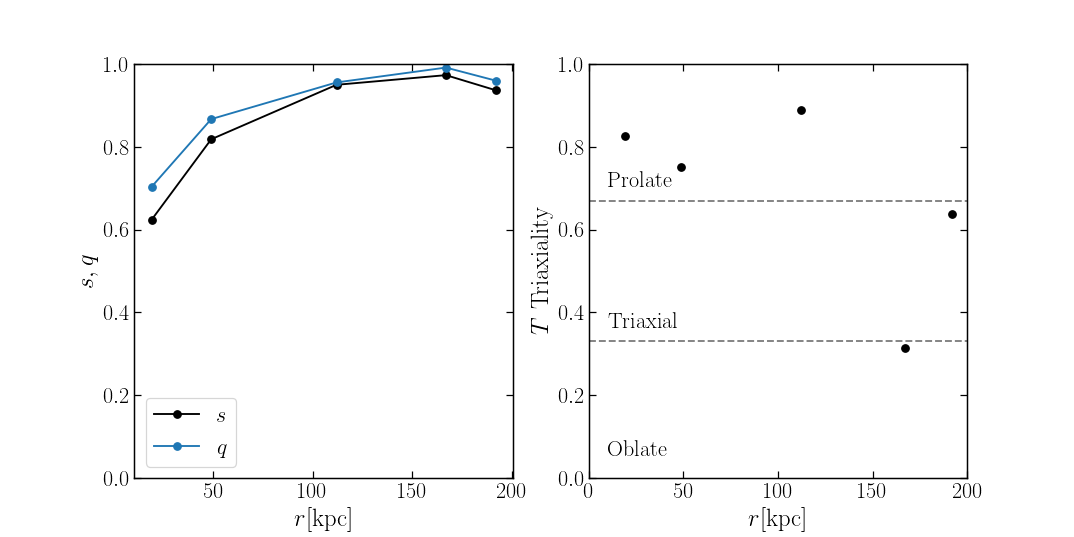

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:591: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


Text(0,0.5,'$T\\ \\rm{Triaxiality}$')

In [340]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
r_s = [r_s_23, r_s_24, r_s_25, r_s_26, r_s_27]
ax[0].plot(r_s, [s_3, s_4, s_5, s_6, s_7], '-o', c='k', label='$s$')
ax[0].plot(r_s, [q_3, q_4, q_5, q_6, q_7], '-o', label='$q$')

ax[0].set_ylim(0, 1)
ax[0].legend()
ax[0].set_xlabel(r'$r\rm{[kpc]}$')
ax[0].set_ylabel(r'$s, q$')

ax[1].scatter(r_s_23, (1-q_3**2)/(1-s_3**2), c='k')
ax[1].scatter(r_s_24, (1-q_4**2)/(1-s_4**2), c='k')
ax[1].scatter(r_s_25, (1-q_5**2)/(1-s_5**2), c='k')
ax[1].scatter(r_s_26, (1-q_6**2)/(1-s_6**2), c='k')
ax[1].scatter(r_s_27, (1-q_7**2)/(1-s_7**2), c='k')
ax[1].axhline(0.67, c='k', ls='--', alpha=0.5)
ax[1].axhline(0.33, c='k', ls='--', alpha=0.5)
ax[1].text(10, 0.05, r'$\rm{Oblate}$')
ax[1].text(10, 0.36, r'$\rm{Triaxial}$')
ax[1].text(10, 0.7, r'$\rm{Prolate}$')
ax[1].set_ylim(0, 1)
ax[1].set_xlim(0, 200)
ax[1].set_xlabel(r'$r\rm{[kpc]}$')
ax[1].set_ylabel(r'$T\ \rm{Triaxiality}$')


In [314]:
def likelihood(pos, pos_fit):
    assert(np.shape(pos)[-1]==np.shape(pos_fit)[-1])
    r_data = np.sqrt(pos[:,0]**2 + pos[:,1]**2 + pos[:,2]**2)
    dist_r = np.zeros(len(pos))
    for i in range(len(pos)):
        dist = np.sqrt((pos[i,0]-pos_fit[:,0])**2 + (pos[i,1]-pos_fit[:,1])**2 + (pos[i,2]-pos_fit[:,2])**2)
        dist_r = np.min(dist)
    return np.mean(dist_r)

In [315]:
np.shape(np.array([x_grid[index_dens23], y_grid[index_dens23], z_grid[index_dens23]]).T)

(10705, 3)

In [324]:
np.shape(pos_elli_3[:,:,0].flatten())

(10000,)

In [330]:
L_r_23 = likelihood(np.array([x_grid[index_dens23], y_grid[index_dens23], z_grid[index_dens23]]).T,
                    np.array([pos_elli_3[:,:,0].flatten(), pos_elli_3[:,:,1].flatten(), 
                              pos_elli_3[:,:,2].flatten()]).T)
L_r_24 = likelihood(np.array([x_grid[index_dens24], y_grid[index_dens24], z_grid[index_dens24]]).T, 
                    np.array([pos_elli_4[:,:,0].flatten(), pos_elli_4[:,:,1].flatten(), 
                              pos_elli_4[:,:,2].flatten()]).T)
L_r_25 = likelihood(np.array([x_grid[index_dens25], y_grid[index_dens25], z_grid[index_dens25]]).T,
                    np.array([pos_elli_5[:,:,0].flatten(), pos_elli_5[:,:,1].flatten(), 
                              pos_elli_5[:,:,2].flatten()]).T)
L_r_26 = likelihood(np.array([x_grid[index_dens26], y_grid[index_dens26], z_grid[index_dens26]]).T, 
                    np.array([pos_elli_6[:,:,0].flatten(), pos_elli_6[:,:,1].flatten(), 
                              pos_elli_6[:,:,2].flatten()]).T)
L_r_27 = likelihood(np.array([x_grid[index_dens27], y_grid[index_dens27], z_grid[index_dens27]]).T,
                    np.array([pos_elli_7[:,:,0].flatten(), pos_elli_7[:,:,1].flatten(), 
                              pos_elli_7[:,:,2].flatten()]).T)

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


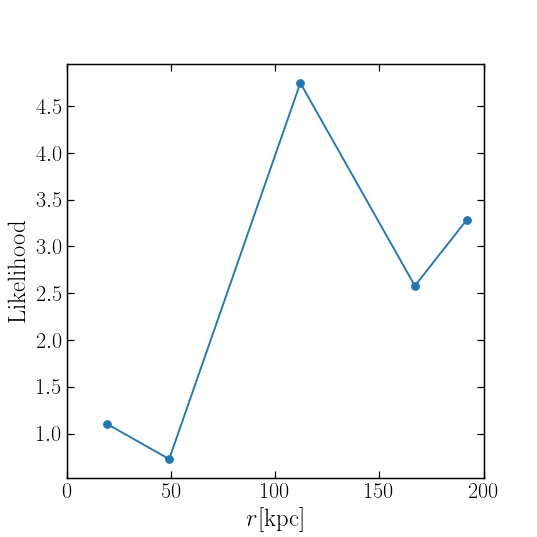

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0, 200)

In [333]:
plt.figure(figsize=(6,6))
plt.plot(r_s, [L_r_23, L_r_24, L_r_25, L_r_26, L_r_27], '-o')
plt.xlabel(r'$r\rm{[kpc]}$')
plt.ylabel(r'$\rm{Likelihood}$')
plt.xlim(0, 200)